<a href="https://colab.research.google.com/github/FlorDGM13/caso_1_Analisis_de_datos/blob/main/caso1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) LIBRERIAS

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

2. SERIES

In [ ]:
#series de pandas
numeros = [3, 4, 5, 6, 7]
numeros, type(numeros)

([3, 4, 5, 6, 7], list)

In [ ]:
serie = pd.Series(numeros)
serie, type(serie)

(0    3
 1    4
 2    5
 3    6
 4    7
 dtype: int64,
 pandas.core.series.Series)

3) DATAFRAME

In [ ]:
#Crear un data frame
data = {
    "Nombre": ["Ana", "Juan", "Pedro", "Maria", "Luis"],
    "Edad": [22, 25, 28, 23, 20],
    "Ciudad": ["Barcelona", "Madrid", "Valencia", "Sevilla", "Bilboa"]
}
data, type(data)

({'Nombre': ['Ana', 'Juan', 'Pedro', 'Maria', 'Luis'],
  'Edad': [22, 25, 28, 23, 20],
  'Ciudad': ['Barcelona', 'Madrid', 'Valencia', 'Sevilla', 'Bilboa']},
 dict)

In [ ]:
#Generar un data frame

df = pd.DataFrame(data)
df

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
1,Juan,25,Madrid
2,Pedro,28,Valencia
3,Maria,23,Sevilla
4,Luis,20,Bilboa


3.1) IMPORTAR U EXPORTAR DATAFRAME

In [ ]:
#exportar dataframe
df.to_csv("data.csv")

In [ ]:
#importar un dataframe
import_df = pd.read_csv("data.csv", index_col=0)
import_df

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
1,Juan,25,Madrid
2,Pedro,28,Valencia
3,Maria,23,Sevilla
4,Luis,20,Bilboa


4) SELECCIONAR DATOS

In [ ]:
#seleccionar columna
nombres = df["Nombre"]
print(nombres, type(nombres))

0      Ana
1     Juan
2    Pedro
3    Maria
4     Luis
Name: Nombre, dtype: object <class 'pandas.core.series.Series'>


In [ ]:
#Seleccionar una o mas columnas
df [["Nombre","Edad"]]

,Nombre,Edad
0,Ana,22
1,Juan,25
2,Pedro,28
3,Maria,23
4,Luis,20


5) FILTRADO DE DATOS

In [ ]:
#filtrar por indice
fila = df.loc[2]
fila

Nombre       Pedro
Edad            28
Ciudad    Valencia
Name: 2, dtype: object

In [ ]:
#Filtrar por condicion
df[df["Edad"] > 23]

,Nombre,Edad,Ciudad
1,Juan,25,Madrid
2,Pedro,28,Valencia


In [ ]:
filtro = (df["Edad"]>23) & (df["Nombre"].str.startswith("P"))
df[filtro]

,Nombre,Edad,Ciudad
2,Pedro,28,Valencia


In [ ]:
#filtrar  por query
df.query("Edad < 23")

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
4,Luis,20,Bilboa


In [ ]:
df[df["Nombre"].isin(["Ana", "Carlos", "Luis"])]

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
4,Luis,20,Bilboa


In [ ]:
def longitud_5(Nombre):
    return len(Nombre) == 5
df[df["Nombre"].apply(longitud_5)]

,Nombre,Edad,Ciudad
2,Pedro,28,Valencia
3,Maria,23,Sevilla


In [ ]:
#filtrar por condiciones multiples
df[df["Edad"].between(25,35)]

,Nombre,Edad,Ciudad
1,Juan,25,Madrid
2,Pedro,28,Valencia


6) TRATAMIENTO DE DATOS

In [ ]:
data = {
    "Nombre": ["Ana", "Juan", "Pedro", "Maria", "Luis"],
    "Edad": [22, 25, None, 23, 20],
    "Ciudad": ["Barcelona", "Madrid", "Valencia", None, "Bilboa"]
}
df = pd.DataFrame(data)
df

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilboa


In [ ]:
#TRABAJAR CON LOS MISSING VALUES
#RELLENAR VALORES
df_fill = df.fillna(
    {
        "Edad": df["Edad"].mean(),
        "Ciudad": "Desconocido"
    }
)
df_fill


,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,22.5,Valencia
3,Maria,23.0,Desconocido
4,Luis,20.0,Bilboa


In [ ]:
#ELIMINAR FILAS CON VALORES FALTANTES
df_sin_nan = df.dropna()
df_sin_nan

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
4,Luis,20.0,Bilboa


In [ ]:
#REEMPLAZAR VALORES ESPECIFICOS DE COLUMNA
df_reem = df.replace(
    {
        "Ciudad": {None: "Descnococido"},
    }
)
df_reem

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,23.0,Descnococido
4,Luis,20.0,Bilboa


In [ ]:
#INTERPOLAR VALORES
df_interpolado = df.copy()
df_interpolado["Edad"] = df["Edad"].interpolate()
df_interpolado

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,24.0,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilboa


In [ ]:
#VALORES DUPLICADOS
data_duplicados = {
    "Nombre": ['Ana', 'Juan', 'Pedro', 'Maria', 'Luis', 'Ana', 'Juan'],
    'Edad': [22, 25, np.nan, 23, 20, 22, 25],
    'Ciudad': ['Barcelona', 'Madrid', 'Valencia', None, 'Bilbao', 'Barcelona', 'Madrid']
}

df_duplicado =pd.DataFrame(data_duplicados)
df_duplicado

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilbao
5,Ana,22.0,Barcelona
6,Juan,25.0,Madrid


In [ ]:
df_sin_duplicado = df_duplicado.drop_duplicates()
df_sin_duplicado

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilbao


In [ ]:
df_renombrado = df.rename(columns={"Nombre": "Name", "Edad":'Age', "Ciudad": 'City'})
df_renombrado

,Name,Age,City
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilboa


In [ ]:
#ORDENAR
columns_ordenadas = ['Ciudad','Edad', 'Nombre']
df_ordenado = df[columns_ordenadas]
df_ordenado

,Ciudad,Edad,Nombre
0,Barcelona,22.0,Ana
1,Madrid,25.0,Juan
2,Valencia,NaN,Pedro
3,None,23.0,Maria
4,Bilboa,20.0,Luis


In [ ]:
#TRANSFORMACION DE DATOS
def cuadrado(x):
    return x**2

df['Edad_cuadrado'] = df['Edad'].apply(cuadrado)
df

,Nombre,Edad,Ciudad,Edad_cuadrado
0,Ana,22.0,Barcelona,484.0
1,Juan,25.0,Madrid,625.0
2,Pedro,NaN,Valencia,NaN
3,Maria,23.0,None,529.0
4,Luis,20.0,Bilboa,400.0


6) AGRUPACION DE DATOS

In [ ]:
#AGRUPACION DE DATOS
data = {
    'Nombre': ['Juan', 'Ana', 'Luis', 'Laura', 'Pedro', 'Carla'],
    'Ciudad': ['Madrid', 'Barcelona', 'Madrid', ' Valencia', 'Barcelona', 'Madrid'],
    'Edad': [25, 33, 30, 28, 45, 38],
    'Puntuacion': [80, 90, 85, 88, 75, 91]
}
df = pd.DataFrame(data)
df

,Nombre,Ciudad,Edad,Puntuacion
0,Juan,Madrid,25,80
1,Ana,Barcelona,33,90
2,Luis,Madrid,30,85
3,Laura,Valencia,28,88
4,Pedro,Barcelona,45,75
5,Carla,Madrid,38,91


In [ ]:
#AGRUPAR DATOS POR CIUDAD
grouped = df.groupby('Ciudad')
print(grouped.groups)

{' Valencia': [3], 'Barcelona': [1, 4], 'Madrid': [0, 2, 5]}


7) FUNCIONES DE AGREGACION INCORPORADAS

In [ ]:
#CALCULAR LA SUMA DE LAS EDADES Y PUNTUACIONES POR CIUDAD
aggregated_data = grouped.agg(
    {
        'Edad':'mean',
        'Puntuacion': 'sum'
    }
)
aggregated_data

,Edad,Puntuacion
Ciudad,,
Valencia,28.0,88
Barcelona,39.0,165
Madrid,31.0,256


8) FUNCIONES DE AGREGACION PERSONALIZADAS

In [ ]:
def  rango(series):
    return series.max() - series.min()

#APLICAR LA FUNCION AGREGADA AL GRUPO

aggregated_data_Custom =grouped.agg(
    {
       'Edad': rango,
       'Puntuacion': rango
    }
)
aggregated_data_Custom

,Edad,Puntuacion
Ciudad,,
Valencia,0,0
Barcelona,12,15
Madrid,13,11


9) AGRUPACION MULTINIVEL

In [ ]:
data ["Categoria"] = ['A', 'B', 'A', 'B', 'A', 'B']
df = pd.DataFrame(data)
df

,Nombre,Ciudad,Edad,Puntuacion,Categoria
0,Juan,Madrid,25,80,A
1,Ana,Barcelona,33,90,B
2,Luis,Madrid,30,85,A
3,Laura,Valencia,28,88,B
4,Pedro,Barcelona,45,75,A
5,Carla,Madrid,38,91,B


In [ ]:
#AGRUPACION MULTINIVEL
#Agrupar datos por ciudad y categoria
grouped_multi = df.groupby(["Ciudad", "Categoria"])
grouped_multi.groups

{(' Valencia', 'B'): [3], ('Barcelona', 'A'): [4], ('Barcelona', 'B'): [1], ('Madrid', 'A'): [0, 2], ('Madrid', 'B'): [5]}

In [ ]:
#Calcular la suma de las edades y puntuacion por ciudad y por categoria
aggregated_data_multi = grouped_multi.agg(
    {
        'Edad': "sum",
        'Puntuacion': "mean"
    }
)
aggregated_data_multi

Edad  Puntuacion
Ciudad    Categoria                  
 Valencia B            28        88.0
Barcelona A            45        75.0
          B            33        90.0
Madrid    A            55        82.5
          B            38        91.0

10) AGREGAR DATOS A UN DATAFRAME


In [ ]:
data = {'Nombre': ['Juan', 'Ana', 'Luis', 'Laura'],
        'Edad': [25, 33, 30, 28]}
df =pd.DataFrame(data)
df

,Nombre,Edad
0,Juan,25
1,Ana,33
2,Luis,30
3,Laura,28


In [ ]:
#Agregar columna
df['Ciudad'] = ['Madrid', 'Barcelona', 'Madrid', 'Valencia']
df

,Nombre,Edad,Ciudad
0,Juan,25,Madrid
1,Ana,33,Barcelona
2,Luis,30,Madrid
3,Laura,28,Valencia


In [ ]:
#Generar una fila
new_row = pd.Series({'Noombre': "Pedro", 'Edad': 45, 'Ciudad': "Barcelona",})

#Agregamos nueva fila - concat
df = pd.concat([df, new_row.to_frame().T], ignore_index=True)
df

,Nombre,Edad,Ciudad,Noombre
0,Juan,25,Madrid,NaN
1,Ana,33,Barcelona,NaN
2,Luis,30,Madrid,NaN
3,Laura,28,Valencia,NaN
4,NaN,45,Barcelona,Pedro


11) UNIR DATAFRAME

In [ ]:
#DATAFRAME 1

data = {
    'Nombre': ['Juan', 'Ana', 'Luis', 'Laura'],
    'Edad': [25, 33, 30, 28],
    'Ciudad': ['Madrid', 'Barcelona', 'Madrid', 'Valencia']
}
df = pd.DataFrame(data)
#DATAFRAME 2

data2 = {
    'Nombre': ['Carla', 'Irene'],
    'Edad': [38, 27],
    'Ciudad': ['Madrid', 'Bilbao']
}
df2 = pd.DataFrame(data2)

In [ ]:
df

,Nombre,Edad,Ciudad
0,Juan,25,Madrid
1,Ana,33,Barcelona
2,Luis,30,Madrid
3,Laura,28,Valencia


In [ ]:
df2

,Nombre,Edad,Ciudad
0,Carla,38,Madrid
1,Irene,27,Bilbao


In [ ]:
#combinar dataframes
df_combined = pd.concat([df,df2], ignore_index=True)
df_combined

,Nombre,Edad,Ciudad
0,Juan,25,Madrid
1,Ana,33,Barcelona
2,Luis,30,Madrid
3,Laura,28,Valencia
4,Carla,38,Madrid
5,Irene,27,Bilbao


12) NUMPY

In [ ]:
#Arrelgo de 1D
arr1 = np.array([1,2,3,4,5,6]) #1D
print("Arreglo 1D:", arr1)
print("Forma(shape):", arr1.shape)
print("Tipo de datos (dtype)", arr1.dtype)

Arreglo 1D: [1 2 3 4 5 6]
Forma(shape): (6,)
Tipo de datos (dtype) int32


In [ ]:
#Cambiar la forma de arreglo a matriz 2x3
arr2 = arr1.reshape(2,3) # 2 filas 3 columnas
print("Arreglo 2D: \n", arr2)
print("Forma(shape):", arr2.shape)
print("Tipo de datos (dtype)", arr2.dtype)

Arreglo 2D: 
 [[1 2 3]
 [4 5 6]]
Forma(shape): (2, 3)
Tipo de datos (dtype) int32


In [ ]:
#crear un matriz con forma (4,4) con numeros
#aleatorios entre 0 y 1
matrix = np.random.rand(4,4)
print("Arreglo 2D: \n", matrix)
print("Forma(shape):", matrix.shape)
print("Tipo de datos (dtype)", matrix.dtype)


Arreglo 2D: 
 [[0.07166427 0.43007282 0.51950364 0.32080098]
 [0.55100274 0.45940128 0.34166942 0.49160226]
 [0.52850371 0.56778351 0.01795901 0.99242533]
 [0.37141666 0.7712272  0.4878955  0.85679894]]
Forma(shape): (4, 4)
Tipo de datos (dtype) float64


In [ ]:
#Crear arreglo de 2d apartir de una lista de listas
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(arr, type(arr))

[[1 2 3]
 [4 5 6]
 [7 8 9]] <class 'numpy.ndarray'>


In [ ]:
#Crear un arreglo de 0 forma (3,4)
arr = np.zeros((3,4))
print(arr)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
#Crear un arrelgo con 1 (2,2)
arr = np.ones((2,2))
print(arr)

[[1. 1.]
 [1. 1.]]


In [ ]:
#Acceder a valores de un elemento
arr[1,1] = 10
arr

array([[ 1.,  1.],
       [ 1., 10.]])

13 ) matriz identidad

In [ ]:
#crear una matriz identidad
#Una matriz identidad tiene el mismo numero
# de filas y columnas
arr = np.eye(4)
print(arr)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
#Crear un arreglo 3d de ceros con forma(2,3,4)
arr = np.zeros((2,3,4)) #(num_matriz,filas, columnas)
arr[0,1,2] = 5
print(arr)

[[[0. 0. 0. 0.]
  [0. 0. 5. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


14) TRANSPOSICIÓN MATRIZ

In [ ]:
#TRANSPOSICION
arr = np.random.rand(2,5)
arr

array([[0.87592543, 0.40608823, 0.3910797 , 0.30515073, 0.77619983],
       [0.74035599, 0.67286788, 0.46337241, 0.42460046, 0.36431986]])

In [ ]:
#.T =transpose
arr.T

array([[0.87592543, 0.74035599],
       [0.40608823, 0.67286788],
       [0.3910797 , 0.46337241],
       [0.30515073, 0.42460046],
       [0.77619983, 0.36431986]])

15) COMBINAR MATRICES

In [ ]:
#stacks-combinar arrays para formar nuevos
arr1= np.array([[1,2],[3,4]])
arr2= np.array([[5,6],[7,8]])
arr1, arr2

(array([[1, 2],
        [3, 4]]),
 array([[5, 6],
        [7, 8]]))

In [ ]:
#Concatenar arreglo horizontalmente
arr_h = np.hstack((arr1, arr2))
print(arr_h)

[[1 2 5 6]
 [3 4 7 8]]


In [ ]:
#Concatenar de forma vertical
arr_v = np.vstack((arr1, arr2))
arr_v

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

16) OPERACIONES MATEMATICAS Y ESTADÍSTICAS

In [ ]:
arr = np.array([1,2,3,4,5])
arr

array([1, 2, 3, 4, 5])

In [ ]:
#Calcular la suma de elementos
suma = np.sum(arr)
suma


15

In [ ]:
#Calcular el promedio de los elementos
promedio = np.mean(arr)
promedio

3.0

In [ ]:
mediana = np.median(arr)
mediana

3.0

In [ ]:
#Calcular el producto de los elementos
producto = np.prod(arr)
producto

120

In [ ]:
#Desviacion estandar
desv_est =np.std(arr)
desv_est

1.4142135623730951

In [ ]:
#Varianza
var = np.var(arr)
var

2.0

In [ ]:
#minimo de los elementos
minimo = np.min(arr)
minimo

1

In [ ]:
#Maximo
maximo = np.max(arr)
maximo

5

In [ ]:
#Calcular la suma acumulativa
cumsum = np.cumsum(arr)
cumsum
#Acumula la suma

array([ 1,  3,  6, 10, 15])

operaciones vectoriales

In [ ]:
#Suma element-wise : elemento a elemnto
arr + arr

array([ 2,  4,  6,  8, 10])

In [ ]:
#resta element wise
arr - arr

array([0, 0, 0, 0, 0])

In [ ]:
#Multiplicacion
arr * arr

array([ 1,  4,  9, 16, 25])

In [ ]:
#division
arr / arr

array([1., 1., 1., 1., 1.])

17) INTEGRACION DE PANDAS Y NUMPY

In [ ]:
#Crear un arreglo de numpy
data = np.array([[1,2,3],[4,5,6],[7,8,9]])
#Crear un data frame a partir del arreglo de numpy
df = pd.DataFrame(data, columns=['A', 'B', 'C'])
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [ ]:
data = {
    'A': [1,4,7],
    'B': [2,5,8],
    'C': [3,6,9]
}
df = pd.DataFrame(data)
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [ ]:
#Convertir un dataframe a un array de numpy
arr = df.to_numpy()
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int64)

In [ ]:
df.values

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int64)

In [ ]:
#Calcular el promedio de cada columna utilizando numpy
mean_columns = np.mean(df, axis=0)
#axis 0 columnas
#axis 1 filas
mean_columns

A    4.0
B    5.0
C    6.0
dtype: float64

In [ ]:
df.mean(axis=0)

A    4.0
B    5.0
C    6.0
dtype: float64

In [ ]:
df.mean(axis=1)

0    2.0
1    5.0
2    8.0
dtype: float64

18) MATPLOTLIB


In [ ]:
import matplotlib.pyplot as plt

GRÁFICO #1

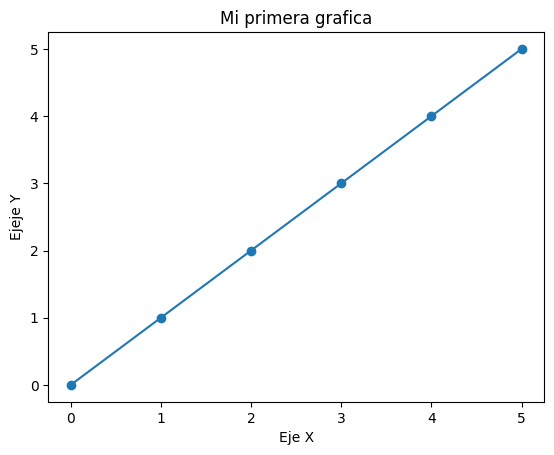

In [ ]:
#ejemplo de una linea simple
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 2, 3, 4, 5]
plt.plot(x,y)
plt.scatter(x,y) #genera puntos
plt.xlabel("Eje X") #poner nombre al eje x
plt.ylabel("Ejeje Y")# poner nombre al eje y
plt.title("Mi primera grafica") #Nombre al grafico
plt.show() # para script de python

GRÁFICO #2

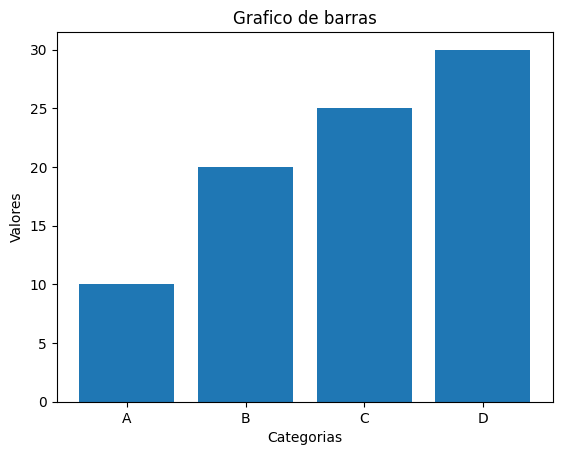

In [ ]:
#GRAFICO DE BARRAS
categorias = ['A', 'B', 'C', 'D']
valores = [10, 20, 25, 30]
plt.bar(categorias, valores)
plt.title("Grafico de barras")
plt.xlabel("Categorias")
plt.ylabel("Valores")
plt.show()

In [ ]:
plt.style.use("ggplot")
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

GRÁFICO #3

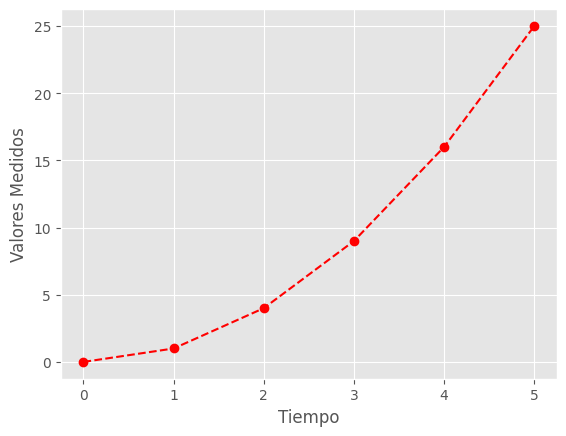

In [ ]:
x= [0,1,2,3,4,5]
y= [0,1,4,9,16,25]
plt.plot(x,y,color="red", linestyle="--", marker='o')
plt.xlabel('Tiempo')
plt.ylabel('Valores Medidos')
plt.show()

19) SEABORN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


GRÁFICO #4

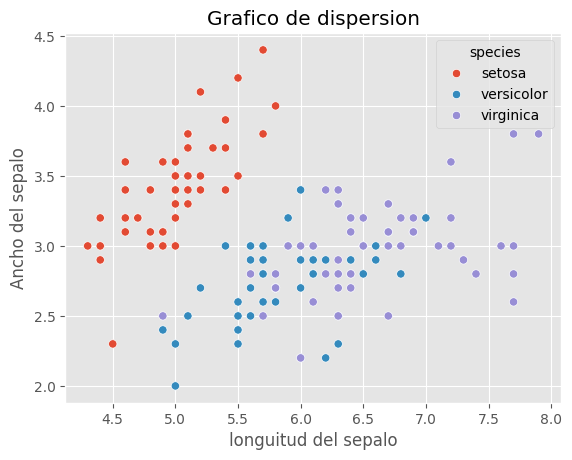

In [ ]:
#Grafica de dispersion
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=data)
plt.xlabel("longuitud del sepalo")
plt.ylabel('Ancho del sepalo')
plt.title('Grafico de dispersion')
plt.show()

GRÁFICO #5

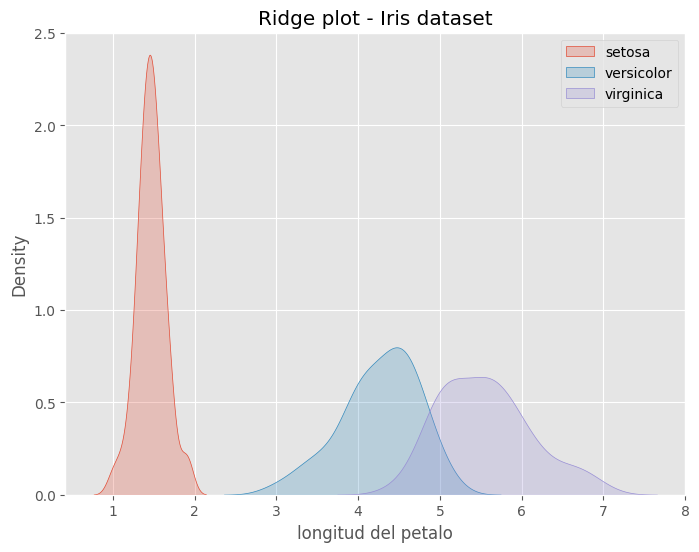

In [ ]:
#Grafica de ridgeplot
setosa =  data[data['species']=='setosa']
versicolor = data[data['species']=='versicolor']
virginica =  data[data['species']=='virginica']

#Configuramos la figura y los ejes
fig, ax = plt.subplots(figsize=(8,6))
plt.xlabel('longitud del petalo')

#Crear el ridgeplot usando kdeplot
sns.kdeplot(data=setosa['petal_length'], label='setosa', ax = ax, fill=True)
sns.kdeplot(data=versicolor['petal_length'], label='versicolor', ax = ax, fill=True)
sns.kdeplot(data=virginica['petal_length'], label='virginica', ax = ax, fill=True)

#Ajustamos la posicion de las leyendas
ax.legend(loc='upper right')

plt.title('Ridge plot - Iris dataset')
plt.show()



GRÁFICO #6

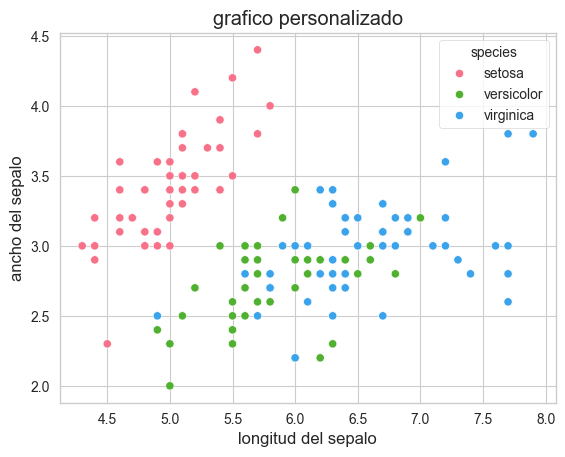

In [ ]:
#Grafico de dsipersion
sns.set_style('whitegrid')
palette = sns.color_palette('husl', 3)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=data, palette=palette)
plt.xlabel('longitud del sepalo')
plt.ylabel('ancho del sepalo')
plt.title('grafico personalizado')
plt.show()

In [ ]:
#Generar datos de ejemplo
#devaluacion de precios de autos
np.random.seed(42)
edad_autos = np.random.randint(0,20, size=200)
precio_autos = 30 - edad_autos + np.random.normal(-3,3, size=200)
data = pd.DataFrame({
    'edad': edad_autos,
    'precio': precio_autos
})
data

,edad,precio
0,6,23.662535
1,19,9.816449
2,14,10.839106
3,10,16.190199
4,7,19.569613
...,...,...
195,15,12.807953
196,2,30.441000
197,19,9.213749
198,3,24.270218


GRÁFICO #7

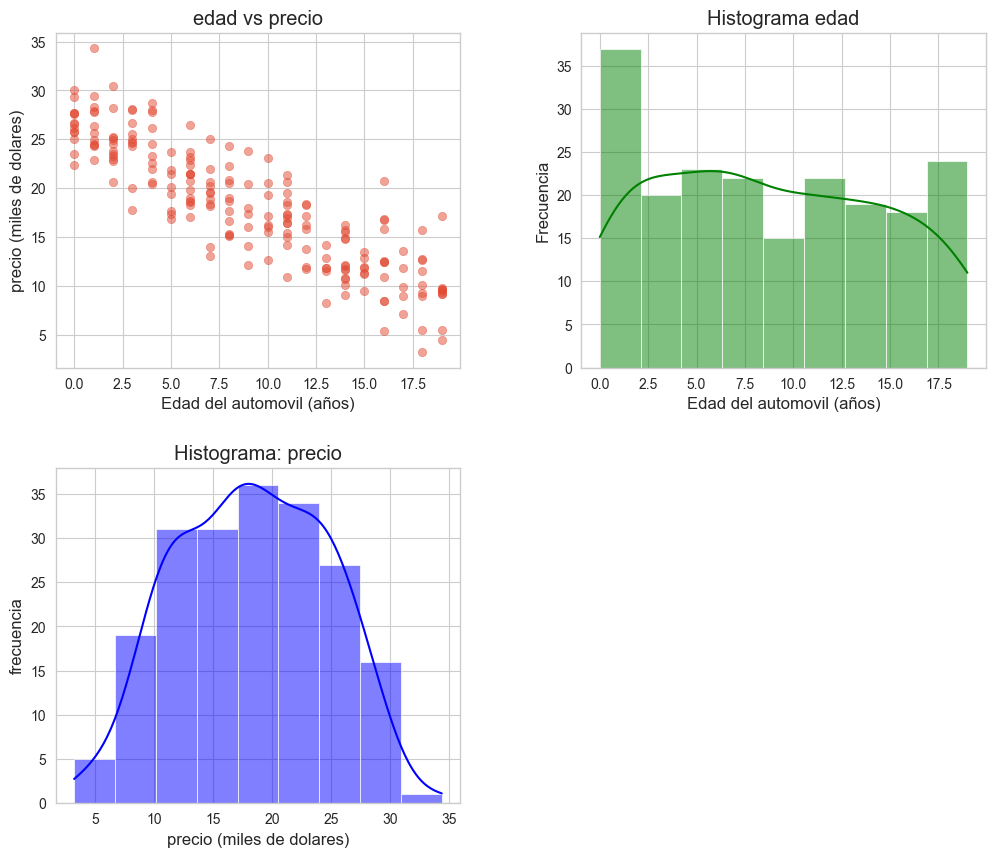

In [ ]:
#creacion del grafico
fig, ax=plt.subplots(2,2, figsize=(12,10))

#Grafico de dispersion
ax[0,0].scatter(data['edad'],data['precio'], alpha=0.5)
ax[0,0].set_xlabel('Edad del automovil (años)')
ax[0,0].set_ylabel('precio (miles de dolares)')
ax[0,0].set_title('edad vs precio')

#histograma de la edad
sns.histplot(data['edad'], ax=ax[0,1], kde=True, color='g')
ax[0,1].set_xlabel('Edad del automovil (años)')
ax[0,1].set_ylabel('Frecuencia')
ax[0,1].set_title('Histograma edad')


#histograma del precio
sns.histplot(data['precio'], ax=ax[1,0], kde=True, color='b')
ax[1,0].set_xlabel('precio (miles de dolares)')
ax[1,0].set_ylabel('frecuencia')
ax[1,0].set_title('Histograma: precio')

#eleiminar 4to subplot
ax[1,1].axis('off')

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()